In [19]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_COLOR_DESAT = '#D98C90'
CR_COLOR_DESAT = '#A0A0A0'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']


BS_animal_M2 = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']

act_directory = 'D:\\Analysis_Cache_M2_300'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'Z:\\Behavioor'

stdfont = 14
stdyfrac = 0.06

M2_FRmod_baseline_median = 2.3
AC_FRmod_baseline_median = 3.5

import scipy

M2stimulusdecoding = 'D:\\stimdecoding_25s_M2.csv'
ACstimulusdecoding = 'D:\\stimdecoding_25s_AC.csv'
M2choicedecodingfilename = 'D:\\choicedecoding_25s_M2.csv'
ACchoicedecodingfilename = 'D:\\choicedecoding_25s_AC.csv'


stim25sdecodingfilename = 'D:\\stimdecoding_25s_M2.csv'
passivedecodingfilename = 'D:\\stimdecoding_25s_passive.csv'


In [2]:
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.weight'] = 'light'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\insan\Desktop\EphysAnalysis\Notebooks\TH\Dual\../../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite v

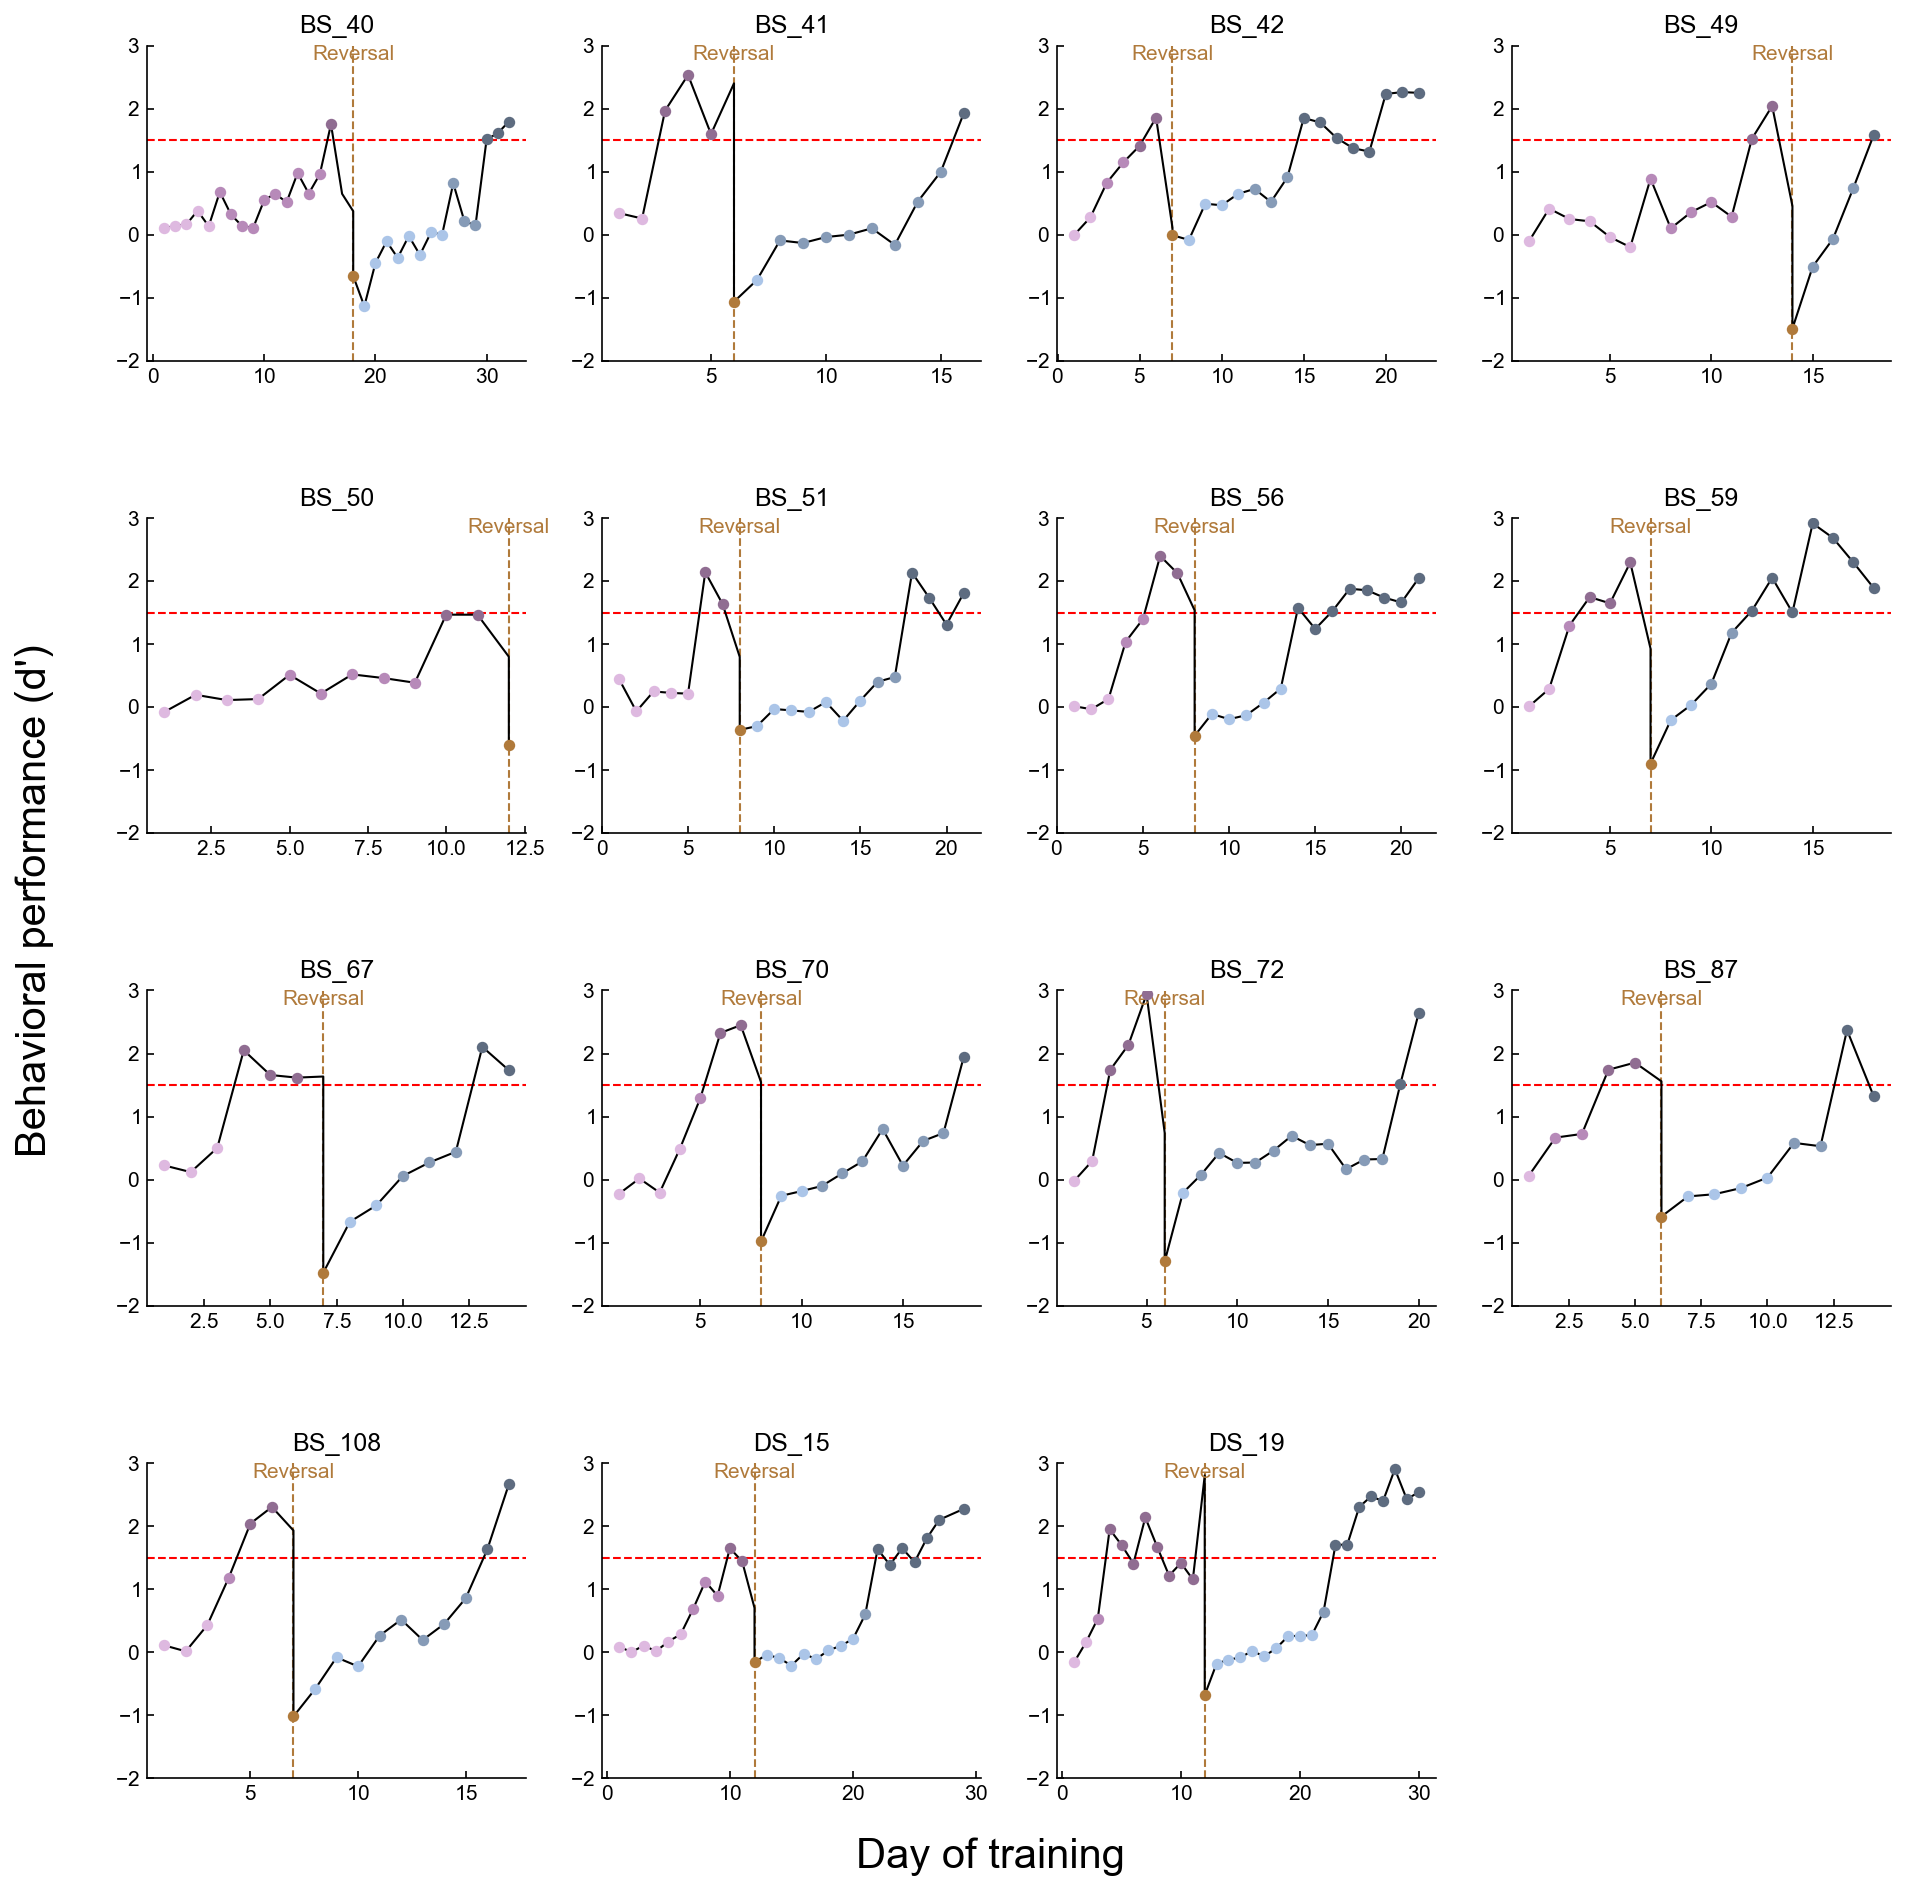

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)

In [5]:
EnumACSession = []
EnumACClust = []
EnumM2Session = []
EnumM2Clust = []

sessions = os.listdir(act_directory)

numAC = 0
numM2 = 0

for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.task in ['opto nonreversal','opto switch','opto reversal']:
        continue
    if sessionfile.meta.task in ['opto control nonreversal','opto control switch','opto control reversal']:
        continue
    
    if sessionfile.meta.animal not in animals:
        continue
    
    #attribute neurons based on the region
    if sessionfile.meta.region == 'AC':
        numAC += len(sessionfile.clusters.good)
        
        for clust in sessionfile.clusters.good:
            EnumACSession.append(session)
            EnumACClust.append(clust)
            
    elif sessionfile.meta.region == 'M2':
        numM2 += len(sessionfile.clusters.good)
        
        for clust in sessionfile.clusters.good:
            EnumM2Session.append(session)
            EnumM2Clust.append(clust)    
    else:
        pass

        
print('AC       : ' + str(numAC))
print('M2       : ' + str(numM2))

100%|██████████| 554/554 [00:07<00:00, 78.05it/s] 

AC       : 1831
M2       : 1624


In [6]:
EILM2phases = np.full_like(EnumM2Session,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumM2Session)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch']:
            EILM2phases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILM2phases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILM2phases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILM2phases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_early_days:
            EILM2phases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_late_days:
            EILM2phases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_expert_days:
            EILM2phases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1624/1624 [00:32<00:00, 50.69it/s] 

errors for: []


In [7]:
EILACphases = np.full_like(EnumACSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumACSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch']:
            EILACphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILACphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILACphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILACphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_early_days:
            EILACphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_late_days:
            EILACphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_expert_days:
            EILACphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1831/1831 [00:34<00:00, 52.60it/s] 

errors for: []


In [8]:
preearly_animals_M2 = []
prelate_animals_M2  = []
preexpert_animals_M2  = []
postearly_animals_M2  = []
postlate_animals_M2  = []
postexpert_animals_M2  = []

FRmod_preearly_M2 = []
FRmod_prelate_M2 = []
FRmod_preexpert_M2 = []
FRmod_postearly_M2 = []
FRmod_postlate_M2 = []
FRmod_postexpert_M2 = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumM2Session,EnumM2Clust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if EILM2phases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        
    except Exception as e:
        FRmod = np.nan
        
    if EILM2phases[idx] == 'pre early':
        FRmod_preearly_M2.append(FRmod)
        preearly_animals_M2.append(sessionfile.meta.animal)   
        
    elif EILM2phases[idx] == 'pre late':
        FRmod_prelate_M2.append(FRmod)
        prelate_animals_M2.append(sessionfile.meta.animal)  
        
    elif EILM2phases[idx] == 'pre expert':
        FRmod_preexpert_M2.append(FRmod)
        preexpert_animals_M2.append(sessionfile.meta.animal)     
        
    elif EILM2phases[idx] == 'post early':
        FRmod_postearly_M2.append(FRmod)
        postearly_animals_M2.append(sessionfile.meta.animal)   
        
    elif EILM2phases[idx] == 'post late':
        FRmod_postlate_M2.append(FRmod)
        postlate_animals_M2.append(sessionfile.meta.animal)    
        
    elif EILM2phases[idx] == 'post expert':
        FRmod_postexpert_M2.append(FRmod)
        postexpert_animals_M2.append(sessionfile.meta.animal)

FRmod_preearly_M2 = np.array(FRmod_preearly_M2)
FRmod_prelate_M2 = np.array(FRmod_prelate_M2)
FRmod_preexpert_M2 = np.array(FRmod_preexpert_M2)
FRmod_postearly_M2 = np.array(FRmod_postearly_M2)
FRmod_postlate_M2 = np.array(FRmod_postlate_M2)
FRmod_postexpert_M2 = np.array(FRmod_postexpert_M2)

1624it [00:31, 52.05it/s] 


In [9]:
preearly_animals_AC = []
prelate_animals_AC  = []
preexpert_animals_AC  = []
postearly_animals_AC  = []
postlate_animals_AC  = []
postexpert_animals_AC  = []

FRmod_preearly_AC = []
FRmod_prelate_AC = []
FRmod_preexpert_AC = []
FRmod_postearly_AC = []
FRmod_postlate_AC = []
FRmod_postexpert_AC = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if EILACphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        
    except Exception as e:
        FRmod = np.nan
        
    if EILACphases[idx] == 'pre early':
        FRmod_preearly_AC.append(FRmod)
        preearly_animals_AC.append(sessionfile.meta.animal)   
        
    elif EILACphases[idx] == 'pre late':
        FRmod_prelate_AC.append(FRmod)
        prelate_animals_AC.append(sessionfile.meta.animal)  
        
    elif EILACphases[idx] == 'pre expert':
        FRmod_preexpert_AC.append(FRmod)
        preexpert_animals_AC.append(sessionfile.meta.animal)     
        
    elif EILACphases[idx] == 'post early':
        FRmod_postearly_AC.append(FRmod)
        postearly_animals_AC.append(sessionfile.meta.animal)   
        
    elif EILACphases[idx] == 'post late':
        FRmod_postlate_AC.append(FRmod)
        postlate_animals_AC.append(sessionfile.meta.animal)    
        
    elif EILACphases[idx] == 'post expert':
        FRmod_postexpert_AC.append(FRmod)
        postexpert_animals_AC.append(sessionfile.meta.animal)

FRmod_preearly_AC = np.array(FRmod_preearly_AC)
FRmod_prelate_AC = np.array(FRmod_prelate_AC)
FRmod_preexpert_AC = np.array(FRmod_preexpert_AC)
FRmod_postearly_AC = np.array(FRmod_postearly_AC)
FRmod_postlate_AC = np.array(FRmod_postlate_AC)
FRmod_postexpert_AC = np.array(FRmod_postexpert_AC)

1831it [00:34, 52.53it/s] 


In [10]:
preearly_animals_M2 = np.unique(preearly_animals_M2)
prelate_animals_M2 = np.unique(prelate_animals_M2)
preexpert_animals_M2 = np.unique(preexpert_animals_M2)
postearly_animals_M2 = np.unique(postearly_animals_M2)
postlate_animals_M2 = np.unique(postlate_animals_M2)
postexpert_animals_M2 = np.unique(postexpert_animals_M2)

preearly_animals_AC = np.unique(preearly_animals_AC)
prelate_animals_AC = np.unique(prelate_animals_AC)
preexpert_animals_AC = np.unique(preexpert_animals_AC)
postearly_animals_AC = np.unique(postearly_animals_AC)
postlate_animals_AC = np.unique(postlate_animals_AC)
postexpert_animals_AC = np.unique(postexpert_animals_AC)

print('M2 Animals')
print(preearly_animals_M2)
print(prelate_animals_M2)
print(preexpert_animals_M2)
print(postearly_animals_M2)
print(postlate_animals_M2)
print(postexpert_animals_M2)
print('AC Animals')
print(preearly_animals_AC)
print(prelate_animals_AC)
print(preexpert_animals_AC)
print(postearly_animals_AC)
print(postlate_animals_AC)
print(postexpert_animals_AC)

M2 Animals
['BS_49' 'BS_50']
['BS_40' 'BS_49' 'BS_50' 'BS_70']
['BS_108' 'BS_50' 'BS_70' 'BS_72' 'BS_87']
['BS_108' 'BS_40' 'BS_41' 'BS_42' 'BS_70' 'BS_72' 'BS_87']
['BS_108' 'BS_41' 'BS_42' 'BS_49' 'BS_67' 'BS_70' 'BS_72' 'BS_87']
['BS_42' 'BS_51' 'BS_56' 'BS_59' 'BS_67']
AC Animals
['BS_49' 'BS_50']
['BS_40' 'BS_49' 'BS_50' 'BS_70']
['BS_108' 'BS_40' 'BS_49' 'BS_72' 'BS_87' 'DS_15' 'DS_19']
['BS_108' 'BS_40' 'BS_41' 'BS_42' 'BS_70' 'BS_72' 'BS_87']
['BS_40' 'BS_41' 'BS_42' 'BS_49' 'BS_67' 'BS_70' 'BS_72' 'BS_87']
['BS_40' 'BS_42' 'BS_49' 'BS_51' 'BS_56' 'BS_67' 'BS_70' 'BS_87' 'DS_15'
 'DS_19']


In [11]:
AC_sessions = np.unique(EnumACSession)
M2_sessions = np.unique(EnumM2Session)

AC_sessions = list(AC_sessions)
M2_sessions = list(M2_sessions)

In [12]:
ACphases = np.full_like(AC_sessions,np.nan)
error_animals = []

AC_switch = []
AC_preearly = []
AC_prelate = []
AC_preexpert = []
AC_postearly = []
AC_postlate = []
AC_postexpert = []

for idx,session in enumerate(tqdm(AC_sessions)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch']:
            ACphases[idx] = 'switch'
            AC_switch.append(session)

        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_early_days:
            ACphases[idx] = 'pre early'
            AC_preearly.append(session)
            
        elif sessionfile.meta.task in ['nonreversal']  and day in learning_phases[animal].pre_late_days:
            ACphases[idx] = 'pre late'
            AC_prelate.append(session)
            
        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_expert_days:
            ACphases[idx] = 'pre expert'
            AC_preexpert.append(session)

        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_early_days:
            ACphases[idx] = 'post early'
            AC_postearly.append(session)
            
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_late_days:
            ACphases[idx] = 'post late'
            AC_postlate.append(session)
            
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_expert_days:
            ACphases[idx] = 'post expert'
            AC_postexpert.append(session)
            
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 131/131 [00:01<00:00, 79.46it/s]

errors for: []


In [13]:
M2phases = np.full_like(M2_sessions,np.nan)
error_animals = []

M2_switch = []
M2_preearly = []
M2_prelate = []
M2_preexpert = []
M2_postearly = []
M2_postlate = []
M2_postexpert = []

for idx,session in enumerate(tqdm(M2_sessions)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch']:
            M2phases[idx] = 'switch'
            M2_switch.append(session)

        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_early_days:
            M2phases[idx] = 'pre early'
            M2_preearly.append(session)
            
        elif sessionfile.meta.task in ['nonreversal']  and day in learning_phases[animal].pre_late_days:
            M2phases[idx] = 'pre late'
            M2_prelate.append(session)
            
        elif sessionfile.meta.task in ['nonreversal'] and day in learning_phases[animal].pre_expert_days:
            M2phases[idx] = 'pre expert'
            M2_preexpert.append(session)

        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_early_days:
            M2phases[idx] = 'post early'
            M2_postearly.append(session)
            
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_late_days:
            M2phases[idx] = 'post late'
            M2_postlate.append(session)
            
        elif sessionfile.meta.task in ['reversal']  and day in learning_phases[animal].post_expert_days:
            M2phases[idx] = 'post expert'
            M2_postexpert.append(session)
            
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))


100%|██████████| 102/102 [00:01<00:00, 81.51it/s]

errors for: []


In [14]:
act_directory

'D:\\Analysis_Cache_M2_300'

# Load Decoding Data

In [20]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')

In [ ]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

ChoiceMod_preearly = []
ChoiceMod_prelate = []
ChoiceMod_preexpert = []
ChoiceMod_postearly = []
ChoiceMod_postlate = []
ChoiceMod_postexpert = []
ChoiceMod_switch = []

Stim_Dec_preearly = []
Stim_Dec_prelate = []
Stim_Dec_preexpert = []
Stim_Dec_postearly = []
Stim_Dec_postlate = []
Stim_Dec_postexpert = []

Choice_Dec_preearly = []
Choice_Dec_prelate = []
Choice_Dec_preexpert = []
Choice_Dec_postearly = []
Choice_Dec_postlate = []
Choice_Dec_postexpert = []

Control_Stim_Dec_preearly = []
Control_Stim_Dec_prelate = []
Control_Stim_Dec_preexpert = []
Control_Stim_Dec_postearly = []
Control_Stim_Dec_postlate = []
Control_Stim_Dec_postexpert = []

Control_Choice_Dec_preearly = []
Control_Choice_Dec_prelate = []
Control_Choice_Dec_preexpert = []
Control_Choice_Dec_postearly = []
Control_Choice_Dec_postlate = []
Control_Choice_Dec_postexpert = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumM2Session,EnumM2Clust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    except Exception as e:
        print(e)
        FRmod = np.nan
    try:
        ChoiceMod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation_choice
    except Exception as e:
        ChoiceMod = np.nan
        print(f"{session} - choice FRmod: {e}")
        
    stim_acc = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_acc = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    stim_acc_control = getDataPoint(dec_df,session,clust,'stimulus','synthetic_control_weighted_accuracy')
    choice_acc_control = getDataPoint(dec_df,session,clust,'response','synthetic_control_weighted_accuracy')
    
#     if getDataPoint(dec_df,session,clust,'stimulus','pval_shuffled_control') > 0.05 or getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control') > 0.05:
#         stim_acc = np.nan
#     if getDataPoint(dec_df,session,clust,'response','pval_shuffled_control') > 0.05 or getDataPoint(dec_df,session,clust,'response','pval_synthetic_control') > 0.05:
#         choice_acc = np.nan
    if getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control') > 0.05:
        stim_acc = np.nan
    if getDataPoint(dec_df,session,clust,'response','pval_synthetic_control') > 0.05:
        choice_acc = np.nan
        
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(FRmod)
        ChoiceMod_preearly.append(ChoiceMod)
#         Ramping_preearly.append(Ramp)
        Stim_Dec_preearly.append(stim_acc)
        Choice_Dec_preearly.append(choice_acc)
        Control_Stim_Dec_preearly.append(stim_acc_control)
        Control_Choice_Dec_preearly.append(choice_acc_control)
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(FRmod)
        ChoiceMod_prelate.append(ChoiceMod)
#         Ramping_prelate.append(Ramp)
        Stim_Dec_prelate.append(stim_acc)
        Choice_Dec_prelate.append(choice_acc)
        Control_Stim_Dec_prelate.append(stim_acc_control)
        Control_Choice_Dec_prelate.append(choice_acc_control)
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(FRmod)
        ChoiceMod_preexpert.append(ChoiceMod)
#         Ramping_preexpert.append(Ramp)
        Stim_Dec_preexpert.append(stim_acc)
        Choice_Dec_preexpert.append(choice_acc)
        Control_Stim_Dec_preexpert.append(stim_acc_control)
        Control_Choice_Dec_preexpert.append(choice_acc_control)
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(FRmod)
        ChoiceMod_postearly.append(ChoiceMod)
#         Ramping_postearly.append(Ramp)
        Stim_Dec_postearly.append(stim_acc)
        Choice_Dec_postearly.append(choice_acc)
        Control_Stim_Dec_postearly.append(stim_acc_control)
        Control_Choice_Dec_postearly.append(choice_acc_control)
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(FRmod)
        ChoiceMod_postlate.append(ChoiceMod)
#         Ramping_postlate.append(Ramp)
        Stim_Dec_postlate.append(stim_acc)
        Choice_Dec_postlate.append(choice_acc)
        Control_Stim_Dec_postlate.append(stim_acc_control)
        Control_Choice_Dec_postlate.append(choice_acc_control)
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(FRmod)
        ChoiceMod_postexpert.append(ChoiceMod)
#         Ramping_postexpert.append(Ramp)
        Stim_Dec_postexpert.append(stim_acc)
        Choice_Dec_postexpert.append(choice_acc)
        Control_Stim_Dec_postexpert.append(stim_acc_control)
        Control_Choice_Dec_postexpert.append(choice_acc_control)
        
FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

ChoiceMod_preearly = np.array(ChoiceMod_preearly)
ChoiceMod_prelate = np.array(ChoiceMod_prelate)
ChoiceMod_preexpert = np.array(ChoiceMod_preexpert)
ChoiceMod_postearly = np.array(ChoiceMod_postearly)
ChoiceMod_postlate = np.array(ChoiceMod_postlate)
ChoiceMod_postexpert = np.array(ChoiceMod_postexpert)

# Ramping_preearly = np.array(Ramping_preearly)
# Ramping_prelate = np.array(Ramping_prelate)
# Ramping_preexpert = np.array(Ramping_preexpert)
# Ramping_postearly = np.array(Ramping_postearly)
# Ramping_postlate = np.array(Ramping_postlate)
# Ramping_postexpert = np.array(Ramping_postexpert)
        
Stim_Dec_preearly = np.array(Stim_Dec_preearly)
Stim_Dec_prelate = np.array(Stim_Dec_prelate)
Stim_Dec_preexpert = np.array(Stim_Dec_preexpert)
Stim_Dec_postearly = np.array(Stim_Dec_postearly)
Stim_Dec_postlate = np.array(Stim_Dec_postlate)
Stim_Dec_postexpert = np.array(Stim_Dec_postexpert)

Choice_Dec_preearly = np.array(Choice_Dec_preearly)
Choice_Dec_prelate = np.array(Choice_Dec_prelate)
Choice_Dec_preexpert = np.array(Choice_Dec_preexpert)
Choice_Dec_postearly = np.array(Choice_Dec_postearly)
Choice_Dec_postlate = np.array(Choice_Dec_postlate)
Choice_Dec_postexpert = np.array(Choice_Dec_postexpert)

Control_Stim_Dec_preearly = np.array(Control_Stim_Dec_preearly)
Control_Stim_Dec_prelate = np.array(Control_Stim_Dec_prelate)
Control_Stim_Dec_preexpert = np.array(Control_Stim_Dec_preexpert)
Control_Stim_Dec_postearly = np.array(Control_Stim_Dec_postearly)
Control_Stim_Dec_postlate = np.array(Control_Stim_Dec_postlate)
Control_Stim_Dec_postexpert = np.array(Control_Stim_Dec_postexpert)

Control_Choice_Dec_preearly = np.array(Control_Choice_Dec_preearly)
Control_Choice_Dec_prelate = np.array(Control_Choice_Dec_prelate)
Control_Choice_Dec_preexpert = np.array(Control_Choice_Dec_preexpert)
Control_Choice_Dec_postearly = np.array(Control_Choice_Dec_postearly)
Control_Choice_Dec_postlate = np.array(Control_Choice_Dec_postlate)
Control_Choice_Dec_postexpert = np.array(Control_Choice_Dec_postexpert)

In [ ]:
Control_Stim_Dec_overall = np.concatenate([Control_Stim_Dec_preearly,Control_Stim_Dec_prelate,Control_Stim_Dec_preexpert,Control_Stim_Dec_postearly,Control_Stim_Dec_postlate,Control_Stim_Dec_postexpert])
FRmod_Stim_overall = np.concatenate([FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert])

Control_Choice_Dec_overall = np.concatenate([Control_Choice_Dec_preearly,Control_Choice_Dec_prelate,Control_Choice_Dec_preexpert,Control_Choice_Dec_postearly,Control_Choice_Dec_postlate,Control_Choice_Dec_postexpert])

# TE

In [24]:
stim_25s_df = pd.read_csv(M2stimulusdecoding)
choice_df = pd.read_csv(M2choicedecodingfilename)
#stim_25s_df = pd.read_csv(ACstimulusdecoding)
#choice_df = pd.read_csv(ACchoicedecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')

In [25]:
EnumSession = EnumM2Session
EnumClust = EnumM2Clust

#EnumSession = EnumACSession
#EnumClust = EnumACClust

In [26]:
act_directory

'D:\\Analysis_Cache_M2_300'

In [27]:
stim_acc = []
choice_acc = []
stim_acc_c = []
choice_acc_c = []
stim_acc_s = []
choice_acc_s = []
pval_stim_s = []
pval_choice_s = []
pval_stim_c = []
pval_choice_c = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_accuracy = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    
    pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control')
    pvalue_choice_s = getDataPoint(dec_df,session,clust,'response','pval_synthetic_control')
    
    pvalue_stim_c = 0.01#getDataPoint(dec_df,session,clust,'stimulus','pval_shuffled_control')
    pvalue_choice_c = 0.01#getDataPoint(dec_df,session,clust,'response','pval_shuffled_control')
    
    stim_acc.append(stim_accuracy)
    choice_acc.append(choice_accuracy)
    
    pval_stim_s.append(pvalue_stim_s)
    pval_choice_s.append(pvalue_choice_s)
    
    pval_stim_c.append(pvalue_stim_c)
    pval_choice_c.append(pvalue_choice_c)
    
stim_acc = np.array(stim_acc)
choice_acc = np.array(choice_acc)
pval_stim_s = np.array(pval_stim_s)
pval_choice_s = np.array(pval_choice_s)
pval_stim_c = np.array(pval_stim_c)
pval_choice_c = np.array(pval_choice_c)

1624it [00:06, 236.96it/s]


In [28]:
def get_TE_mask(acc,pval_s):#,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    #is_valid_pval = np.logical_and(np.less(pval_s,0.05) , np.less(pval_c,0.05))
    is_valid_pval = np.less(pval_s,0.05)
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_s,task_encoder_threshold_s = get_TE_mask(stim_acc,pval_stim_s)#,pval_stim_c)
is_TE_c,task_encoder_threshold_c = get_TE_mask(choice_acc,pval_choice_s)#,pval_choice_c)

Task encoder threshold: 0.5749218718219907
Task encoder threshold: 0.6260613726551226


In [24]:
is_TE_s

array([ True,  True,  True, ..., False, False, False])

# M2

In [30]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

FR_CR_evoked = [0,0,0,0,0,0]
FR_CR_suppressed = [0,0,0,0,0,0]
FR_NCR = [0,0,0,0,0,0]

CR_NCR_StimThresh = M2_FRmod_baseline_median


#cellstouseFR = 'all cells'
cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumM2Session,EnumM2Clust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not is_TE_s[idx]:#np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
            
    if EILM2phases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        FRbl = sessionfile.responsiveness[clust]['all_trials'].FRbaseline
        FR = sessionfile.responsiveness[clust]['all_trials'].FR
    except Exception as e:
        print(f"stim: {e}")
        FRmod = np.nan
        FRbl = np.nan
        FR = np.nan

        
    if EILM2phases[idx] == 'pre early':
        FRmod_preearly.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[0] += 1
            else:
                FR_CR_suppressed[0] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[0] += 1

    elif EILM2phases[idx] == 'pre late':
        FRmod_prelate.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[1] += 1
            else:
                FR_CR_suppressed[1] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[1] += 1

    elif EILM2phases[idx] == 'pre expert':
        FRmod_preexpert.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[2] += 1
            else:
                FR_CR_suppressed[2] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[2] += 1

    elif EILM2phases[idx] == 'post early':
        FRmod_postearly.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[3] += 1
            else:
                FR_CR_suppressed[3] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[3] += 1

    elif EILM2phases[idx] == 'post late':
        FRmod_postlate.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[4] += 1
            else:
                FR_CR_suppressed[4] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[4] += 1

    elif EILM2phases[idx] == 'post expert':
        FRmod_postexpert.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[5] += 1
            else:
                FR_CR_suppressed[5] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[5] += 1

FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)


1624it [00:31, 51.15it/s] 


In [ ]:
#all cells M2
# print(FR_CR_evoked)
# print(FR_CR_suppressed)
# print(FR_NCR)
# [82, 94, 93, 136, 115, 107]
# [5, 5, 20, 16, 9, 14]
# [72, 140, 70, 154, 123, 59]

In [31]:
#TE M2
print(FR_CR_evoked)
print(FR_CR_suppressed)
print(FR_NCR)

[15, 22, 49, 17, 24, 73]
[1, 0, 18, 4, 2, 12]
[6, 11, 20, 17, 14, 12]


22
33
87
38
40
97


meta NOT subset; don't know how to subset; dropped


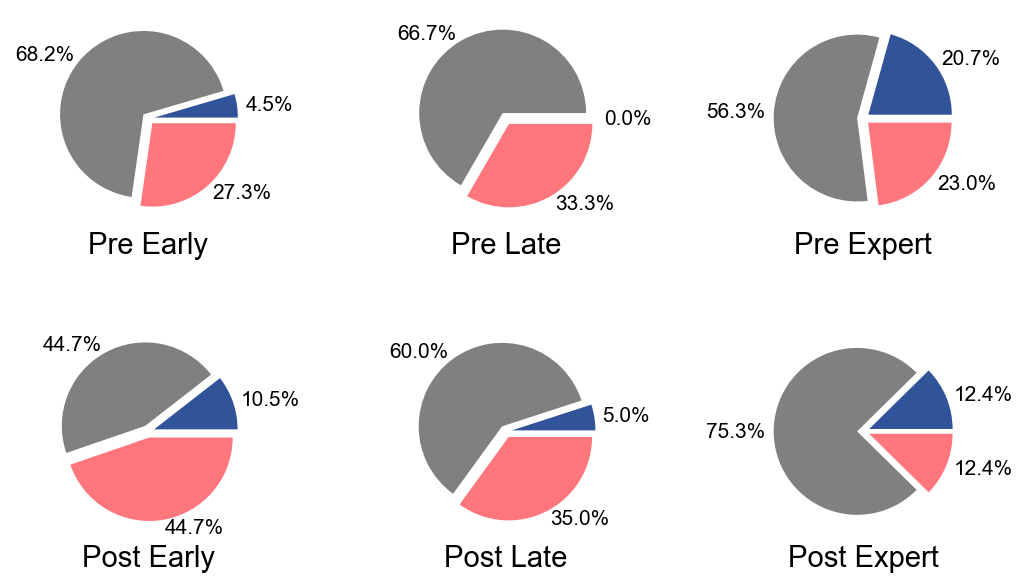

In [32]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def make_gs_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    gs = fig.add_gridspec(2,3,height_ratios=[1,1],hspace=0.5)#,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax4 = plt.subplot(gs[1,0])
    ax5 = plt.subplot(gs[1,1])
    ax6 = plt.subplot(gs[1,2])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    return fig,axs

fig,axs = make_gs_size(8, 4, left=.3, bottom=.3, right=0, top=0)

################################################################################################################

size = 20
summary_size=100
summary_width=1#0.75

mn = M2_FRmod_baseline_median
spread = 2.5

############

pies = []
for idx,(ax,enh,sup,ncr) in enumerate(zip(axs,FR_CR_evoked,FR_CR_suppressed,FR_NCR)):    
    tot = enh+sup+ncr
    print(tot)
    enh = enh / tot * 100
    sup = sup / tot * 100
    ncr = ncr / tot * 100
    fracs = np.array([sup,enh,ncr])
    labs = ['Suppressed','Enhanced','NCRs']
    pies.append(ax.pie(fracs,colors=['#315399',CR_COLOR,NCR_COLOR],labels=[f"{np.around(fr,1)}%" for fr,l in zip(fracs,labs)],explode=[0.075]*3))

################################################################################################################
labels = ['Pre Early','Pre Late','Pre Expert','Post Early','Post Late','Post Expert']
for idx,ax in enumerate(axs):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[idx])
    
#     xtick_pos_pre = ax.get_xticks()[1]
#     xtick_pos_post = ax.get_xticks()[4]
#     Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
#     t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
#     t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
#     ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
#     ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass

#     Y = np.mean(ax.get_ylim())
#     Y = 10**np.mean(np.log10(ax.get_ylim()))
#     t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
#     ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
#     ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [t for t in np.concatenate([p[1] for p in pies])]
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Population statistics\\M2 TE 300.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')
#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Population statistics\\M2 all cells_300.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

# AC

In [21]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []


FR_CR_evoked = [0,0,0,0,0,0]
FR_CR_suppressed = [0,0,0,0,0,0]
FR_NCR = [0,0,0,0,0,0]


CR_NCR_StimThresh = AC_FRmod_baseline_median


#cellstouseFR = 'all cells'
cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not is_TE_s[idx]:#np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
            
    if EILACphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        FRbl = sessionfile.responsiveness[clust]['all_trials'].FRbaseline
        FR = sessionfile.responsiveness[clust]['all_trials'].FR
    except Exception as e:
        print(f"stim: {e}")
        FRmod = np.nan
        FRbl = np.nan
        FR = np.nan

        
    if EILACphases[idx] == 'pre early':
        FRmod_preearly.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[0] += 1
            else:
                FR_CR_suppressed[0] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[0] += 1

    elif EILACphases[idx] == 'pre late':
        FRmod_prelate.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[1] += 1
            else:
                FR_CR_suppressed[1] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[1] += 1

    elif EILACphases[idx] == 'pre expert':
        FRmod_preexpert.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[2] += 1
            else:
                FR_CR_suppressed[2] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[2] += 1

    elif EILACphases[idx] == 'post early':
        FRmod_postearly.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[3] += 1
            else:
                FR_CR_suppressed[3] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[3] += 1

    elif EILACphases[idx] == 'post late':
        FRmod_postlate.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[4] += 1
            else:
                FR_CR_suppressed[4] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[4] += 1

    elif EILACphases[idx] == 'post expert':
        FRmod_postexpert.append(FRmod)

        if FRmod > CR_NCR_StimThresh:
            if FR>FRbl:
                FR_CR_evoked[5] += 1
            else:
                FR_CR_suppressed[5] += 1
        elif FRmod < CR_NCR_StimThresh:
            FR_NCR[5] += 1

FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

1831it [00:36, 50.40it/s] 


37
51
50
93
137
68


meta NOT subset; don't know how to subset; dropped


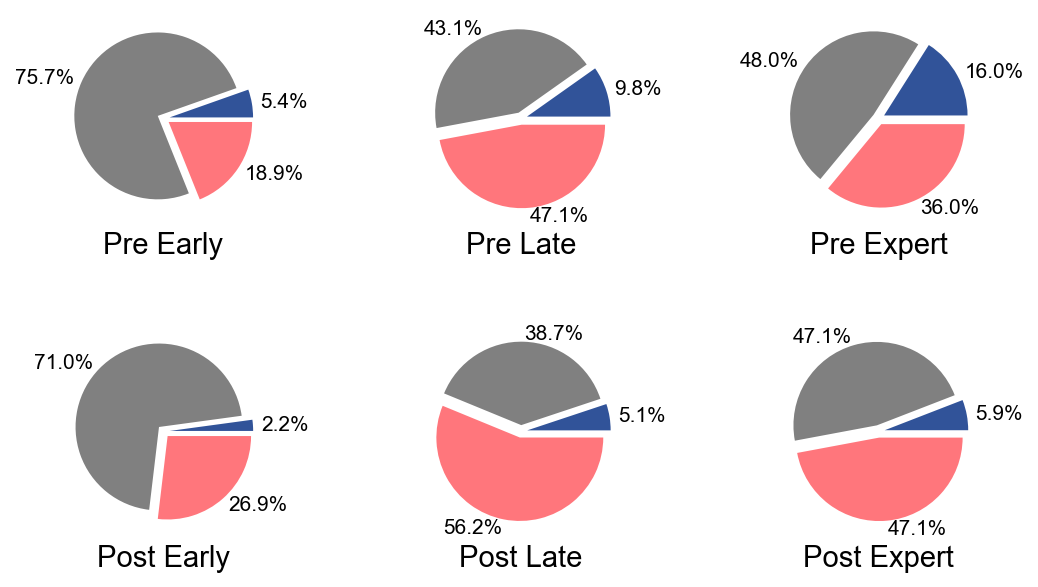

In [22]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def make_gs_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    gs = fig.add_gridspec(2,3,height_ratios=[1,1],hspace=0.5)#,wspace=0.5)#0.1)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])
    ax4 = plt.subplot(gs[1,0])
    ax5 = plt.subplot(gs[1,1])
    ax6 = plt.subplot(gs[1,2])
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    return fig,axs

fig,axs = make_gs_size(8, 4, left=.3, bottom=.3, right=0, top=0)

################################################################################################################

size = 20
summary_size=100
summary_width=1#0.75

mn = 3.5
spread = 2.5

############

pies = []
for idx,(ax,enh,sup,ncr) in enumerate(zip(axs,FR_CR_evoked,FR_CR_suppressed,FR_NCR)):    
    tot = enh+sup+ncr
    print(tot)
    enh = enh / tot * 100
    sup = sup / tot * 100
    ncr = ncr / tot * 100
    fracs = np.array([sup,enh,ncr])
    labs = ['Suppressed','Enhanced','NCRs']
    pies.append(ax.pie(fracs,colors=['#315399',CR_COLOR,NCR_COLOR],labels=[f"{np.around(fr,1)}%" for fr,l in zip(fracs,labs)],explode=[0.075]*3))

################################################################################################################
labels = ['Pre Early','Pre Late','Pre Expert','Post Early','Post Late','Post Expert']
for idx,ax in enumerate(axs):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[idx])
    
#     xtick_pos_pre = ax.get_xticks()[1]
#     xtick_pos_post = ax.get_xticks()[4]
#     Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=True)
#     t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
#     t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
#     ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
#     ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

    ax.tick_params(direction='in', length=6, width=1)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(stdfont)
    for item in (ax.get_xticklabels()):
        item.set_fontsize(stdfont*0.9)
        pass

#     Y = np.mean(ax.get_ylim())
#     Y = 10**np.mean(np.log10(ax.get_ylim()))
#     t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
#     ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
#     ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

artists = [t for t in np.concatenate([p[1] for p in pies])]
#fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Population statistics\\AC all cells.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Multi-region\\Population statistics\\AC TE.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')